m
19.84955661595397
merr
0.170020481426854
q
0.02415817281723476
qerr
0.00630858776951402


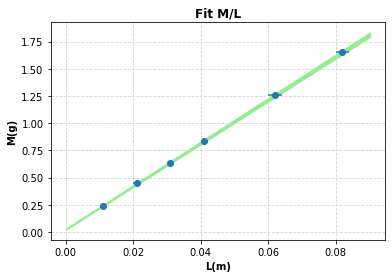

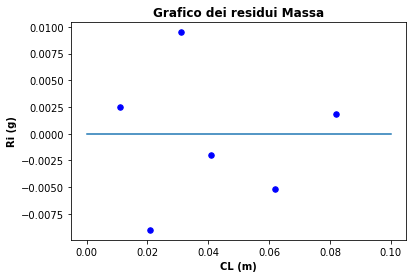

sigma_post_fit
0.0072717280106878645


In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

F = np.array([2.40E-01,4.50E-01,6.30E-01,8.40E-01,1.26E+00,1.65E+00])
F_err = np.ones(len(F))*0.01
CL = np.array([0.011,0.021,0.031,0.041,0.062,0.082])[:len(F)]
CL_err = np.array([0.001,0.001,0.001,0.001,0.002,0.002])[:len(F)]


plt.title("Fit M/L",fontweight="bold")
plt.xlabel("L(m)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(CL, F, xerr=CL_err, yerr=F_err, fmt='o')

fit,cov = np.polyfit(CL,F, 1,w = 1/F_err,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (F_err**2+(m*CL_err)**2)**(1/2)
fit,cov = np.polyfit(CL,F, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit


print("m")
print(m)
print("merr")
print(merr)
print("q")
print(q)
print("qerr")
print(qerr)


x = np.linspace(0,11/10*max(CL),1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)

Ff = q+m*CL

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Massa",fontweight="bold")
plt.xlabel("CL (m)",fontweight="bold")
plt.ylabel("Ri (g)",fontweight="bold")
plt.plot(np.linspace(0,0.1,1000),np.zeros(1000))
plt.scatter(CL,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ri)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)